<a href="https://colab.research.google.com/github/sirinao/Ted-Talks-Project/blob/main/ted_talk_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -


Project Title : TED Talks Views Prediction

Project Type - Supervised learning (Regression)

Contribution - Individual

Name - Siri Chandana Tammineni

# **Problem Statement**


###TED : Technology Entertainment And Design

TED is an unprofitable organisation that post videos online in Free. TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000+ TED talks including transcripts in many languages. It was basically started as a conference in 1984 that designed by Richard saul wurman but due to some reasons it was unsuccesful. After 6 years in 1990 ,it back with a bang. In TED, speaker share their views and ideas to the society in 18 minutes. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

Objective :-
The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

# **GitHub Link -**

https://github.com/sirinao/Ted-Talks-Project.git

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]


###**Importing the Libraries**

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# setting style and rcparams
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Datatime library for Date columns
from datetime import datetime
import datetime as dt

# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# For build pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor


# for plot decision tree
from sklearn import tree

# Model selection libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor
from xgboost import XGBRegressor

# Metrics libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Warnings module handles warnings in Python
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Loading the dataset
file_path = '/content/drive/MyDrive/Almabetter/Project/Data/data_ted_talks.csv'
ted = pd.read_csv(file_path)

In [ ]:
ted.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


##**Description**:-

**talk_id**: A unique identifier for each TED Talk video.

**title**: The title of the talk.

**speaker_1**: The primary speaker for the talk.

**all_speakers**: A list of all the speakers for the talk.

**occupations**: The occupations of the speakers.

**about_speakers**: Information about the speakers, such as their backgrounds and expertise.

**views**: The number of views the video has received.

**recorded_date**: The date the talk was recorded.

**published_date**: The date the talk was published on the TED Talks YouTube channel.

**event**: The name of the TED event where the talk was given.

**native_lang**: The language the talk was given in.

**available_lang**: The languages the talk is available in.

**duration**: The length of the video.(in sec.)

**topics**: The topics covered in the talk.

**related talks**: Other TED Talks that are related to this talk.

**url**: The URL of the video.

**description**: A brief description of the talk.

**transcript**: A transcript of the talk.

In [ ]:
#check information about all columns
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
ted.shape

(4005, 19)

In [ ]:
# describe the numerical dataset
ted.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [ ]:
ted.describe(percentiles=[.25,.50,.75,.80,.85,.90,.95])

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
80%,24402.600000,2.475286e+06,227.000000,1020.000000
85%,32189.400000,3.019490e+06,275.000000,1072.000000
90%,44241.800000,3.994610e+06,351.100000,1133.000000


In [ ]:
# check null values
ted.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [ ]:
#checking duplicated values
ted.duplicated().sum()

0

In [ ]:
talk = ted.copy()

##**Data Cleaning**

In [ ]:
#Removing the unnessecory columns and renaming a column
talk.drop(['talk_id','all_speakers','url','occupations','about_speakers','related_talks','description','transcript'], axis=1, inplace=True)

talk.rename(columns={'speaker_1': 'speaker'}, inplace=True)

In [ ]:
talk.head(2)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics
0,Averting the climate crisis,Al Gore,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change..."
1,The best stats you've ever seen,Hans Rosling,14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic..."


In [ ]:
# Filling null values in Comments column

values =  {'comments':talk["comments"].median()}
talk = talk.fillna(value=values)

In [ ]:
talk.isnull().sum()

title             0
speaker           0
views             0
recorded_date     1
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
dtype: int64

In [ ]:
talk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker         4005 non-null   object 
 2   views           4005 non-null   int64  
 3   recorded_date   4004 non-null   object 
 4   published_date  4005 non-null   object 
 5   event           4005 non-null   object 
 6   native_lang     4005 non-null   object 
 7   available_lang  4005 non-null   object 
 8   comments        4005 non-null   float64
 9   duration        4005 non-null   int64  
 10  topics          4005 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 344.3+ KB


In [ ]:
# change data-types of columns

talk['recorded_date']= pd.to_datetime(talk['recorded_date'])

talk['published_date']= pd.to_datetime(talk['published_date'])

last_published = talk['published_date'].max()

# add one more column days_since

talk['days_since'] = last_published - pd.DatetimeIndex(talk['published_date'])

In [ ]:
talk.sample()

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,days_since
312,Why do societies collapse?,Jared Diamond,2610126,2003-02-28,2008-10-27,TED2003,en,"['ar', 'bg', 'ca', 'cs', 'de', 'el', 'en', 'es...",222.0,1101,"['culture', 'environment', 'global issues', 'h...",4203 days


In [ ]:
# Making seperate column for day, month and year of upload

talk['year'] = talk['published_date'].dt.year
talk['month'] = talk['published_date'].dt.month
talk['published_day'] = talk["published_date"].dt.day_name()

In [ ]:
talk.sample()

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,days_since,year,month,published_day
1754,"Everyday objects, tragic histories",Ziyah Gafić,1043319,2014-03-17,2014-08-22,TED2014,en,"['ar', 'bg', 'bs', 'cs', 'da', 'de', 'el', 'en...",35.0,272,"['TED Fellows', 'photography', 'war']",2078 days,2014,8,Friday


In [ ]:
# storing weekdays in order of numbers from 0 to 6 value

daydict = {'Sunday' : 7, 'Monday' : 1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

# making new column holding information of day number

talk['daynumber'] = talk['published_day'].map(daydict)

In [ ]:
talk.sample()

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,days_since,year,month,published_day,daynumber
1070,The beautiful math behind the world's ugliest ...,Scott Rickard,4360434,2011-09-13,2012-01-20,TEDxMIA,en,"['ar', 'el', 'en', 'es', 'fa', 'fr', 'hu', 'it...",204.0,583,"['TEDx', 'entertainment', 'math', 'music', 'sc...",3023 days,2012,1,Friday,5


In [ ]:
talk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   title           4005 non-null   object         
 1   speaker         4005 non-null   object         
 2   views           4005 non-null   int64          
 3   recorded_date   4004 non-null   datetime64[ns] 
 4   published_date  4005 non-null   datetime64[ns] 
 5   event           4005 non-null   object         
 6   native_lang     4005 non-null   object         
 7   available_lang  4005 non-null   object         
 8   comments        4005 non-null   float64        
 9   duration        4005 non-null   int64          
 10  topics          4005 non-null   object         
 11  days_since      4005 non-null   timedelta64[ns]
 12  year            4005 non-null   int64          
 13  month           4005 non-null   int64          
 14  published_day   4005 non-null   object  

In [ ]:
talk = talk[talk['views']!=0]

In [ ]:
talk.shape

(3999, 16)

In [ ]:
# add one more column Daily views

talk['daily_views'] = talk['views'] / ( talk['days_since'].apply(lambda x : x.days) + 1 )

In [ ]:
talk.sample()

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,days_since,year,month,published_day,daynumber,daily_views
2829,How I'm bringing queer pride to my rural village,Katlego Kolanyane-Kesupile,1230596,2017-08-27,2018-06-14,TEDGlobal 2017,en,"['ar', 'en', 'es', 'eu', 'fa', 'fr', 'it', 'ko...",9.0,349,"['gender', 'activism', 'Gender spectrum', 'gen...",686 days,2018,6,Thursday,4,1791.260553


## **Data Visualization**:

In [ ]:
# create a dataframe with top 10 speakers by views

top10views = talk.groupby('speaker')['views'].sum().reset_index()
top10views = top10views.sort_values('views', ascending = False).head(10)

<Axes: xlabel='views', ylabel='speaker'>

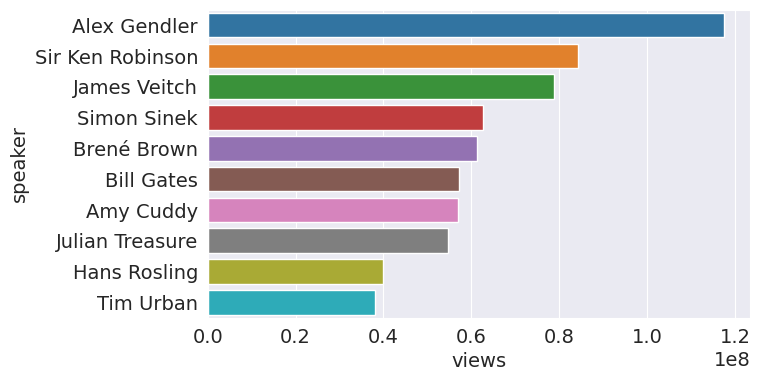

In [ ]:
sns.barplot(x='views', y='speaker', data=top10views)

In [ ]:
# create a dataframe with top 10 speakers by daily views

top5dailyveiws = talk.groupby('speaker')['daily_views'].sum().reset_index()
top5dailyveiws = top5dailyveiws.sort_values('daily_views', ascending = False).head(5)

<Axes: xlabel='speaker', ylabel='daily_views'>

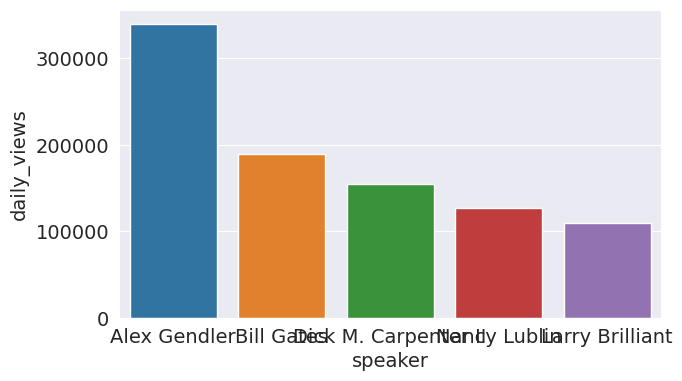

In [ ]:
sns.barplot(x='speaker', y='daily_views',data=top5dailyveiws)

In [ ]:
# create a dataframe with top 10 speakers by comments

top10comments = talk.groupby('speaker')['comments'].sum().reset_index()
top10comments = top10comments.sort_values('comments', ascending = False).head(10)

<Axes: xlabel='comments', ylabel='speaker'>

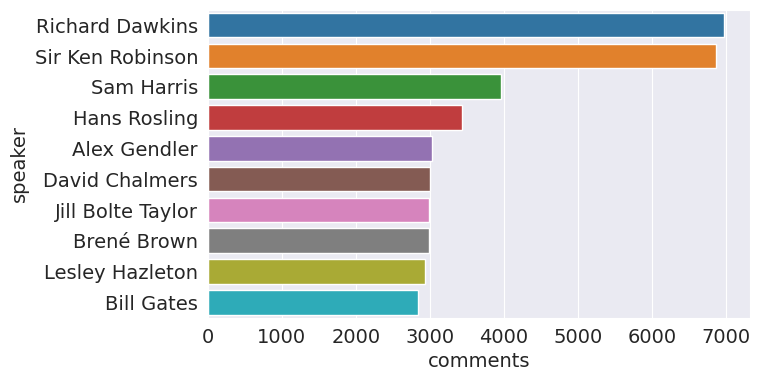

In [ ]:
sns.barplot(x='comments', y='speaker', data=top10comments)

In [ ]:
talk.skew()

views          8.184312
comments       9.653691
duration       1.186224
year          -0.381089
month          0.158058
daynumber      0.160312
daily_views    9.811263
dtype: float64

<Axes: xlabel='comments', ylabel='views'>

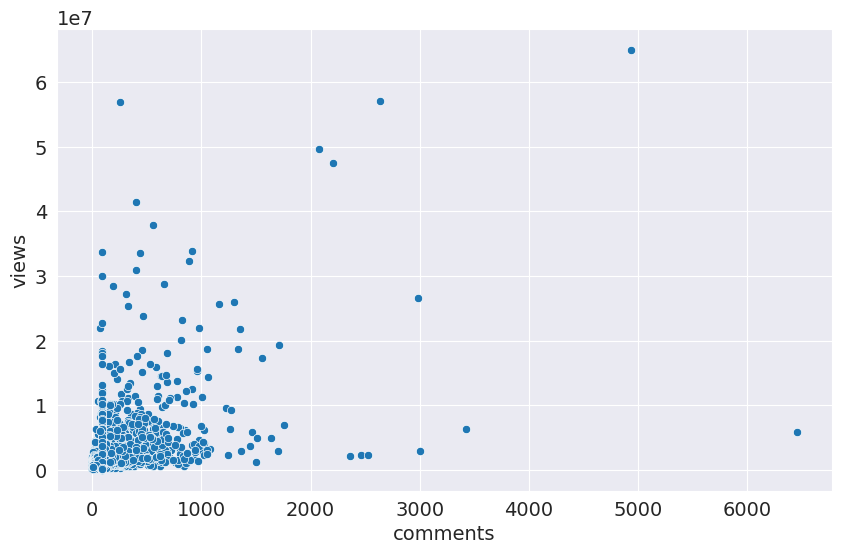

In [ ]:
#Comments Vs Views

plt.figure(figsize=(10,6))
sns.scatterplot(x='comments', y='views', data=talk)

<Axes: xlabel='comments', ylabel='Density'>

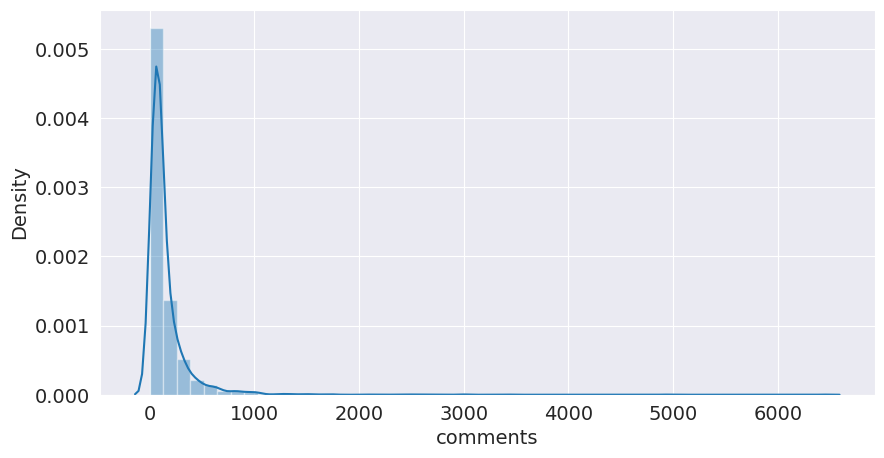

In [ ]:
# check distribution of comments column

plt.rcParams['figure.figsize']=(10,5)
sns.distplot(talk['comments'])

In [ ]:
#Removing the outliers in comments

talk.drop(talk[talk['comments'] > 1100].index, inplace=True)

In [ ]:
talk.shape

(3970, 17)

In [ ]:
talk["comments"].median()

89.0

In [ ]:
talk[talk["comments"] == 0]

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,days_since,year,month,published_day,daynumber,daily_views
3893,The power of the Afro pick,Jon Gray,208222,2020-02-04,2020-02-17,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'tr']",0.0,213,"['design', 'history', 'culture', 'creativity',...",73 days,2020,2,Monday,1,2813.810811
3898,How surfboards connect us to nature,Yves Béhar,181783,2020-02-11,2020-02-18,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'pt-br', 'tr']",0.0,203,"['oceans', 'design', 'creativity', 'water', 's...",72 days,2020,2,Tuesday,2,2490.178082


In [ ]:
talk['comments']= talk['comments'].replace(0, talk["comments"].median())

<Axes: xlabel='comments', ylabel='Density'>

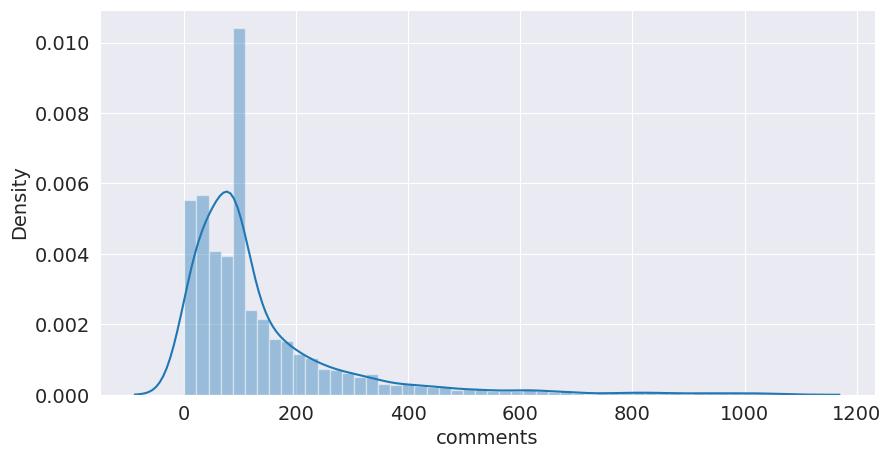

In [ ]:
# check distribution of comments column

sns.distplot(talk['comments'])

<Axes: xlabel='views', ylabel='Density'>

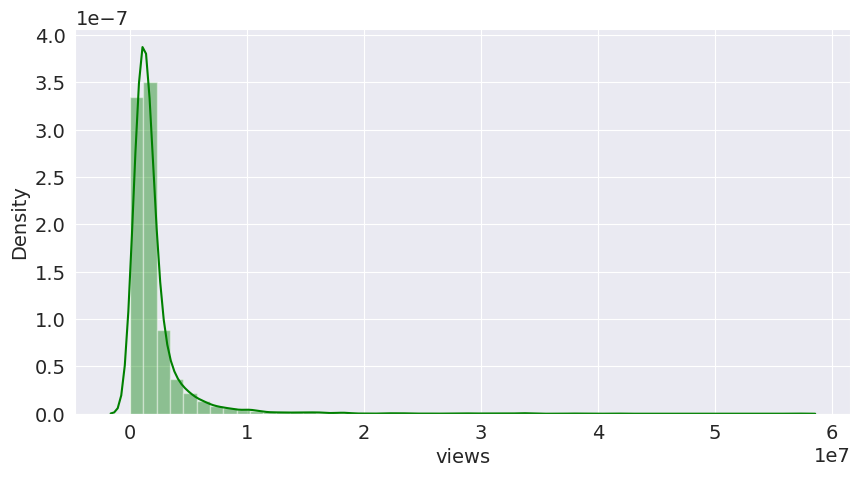

In [ ]:
# check distribution of Views column

sns.distplot(talk['views'], color ='green')

<Axes: xlabel='available_languages', ylabel='Density'>

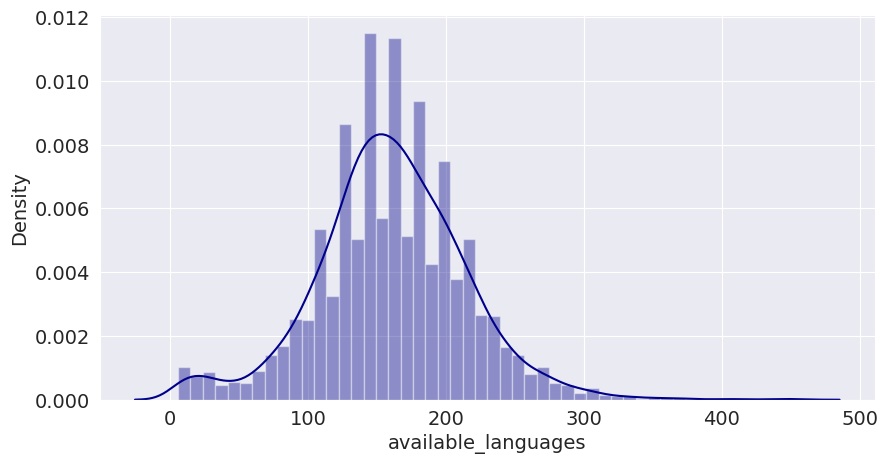

In [ ]:
# check distribution of Available languages column

talk['available_languages'] = talk['available_lang'].apply(lambda x: len(x))
sns.distplot(talk['available_languages'],color = 'darkblue')

<Axes: xlabel='duration', ylabel='views'>

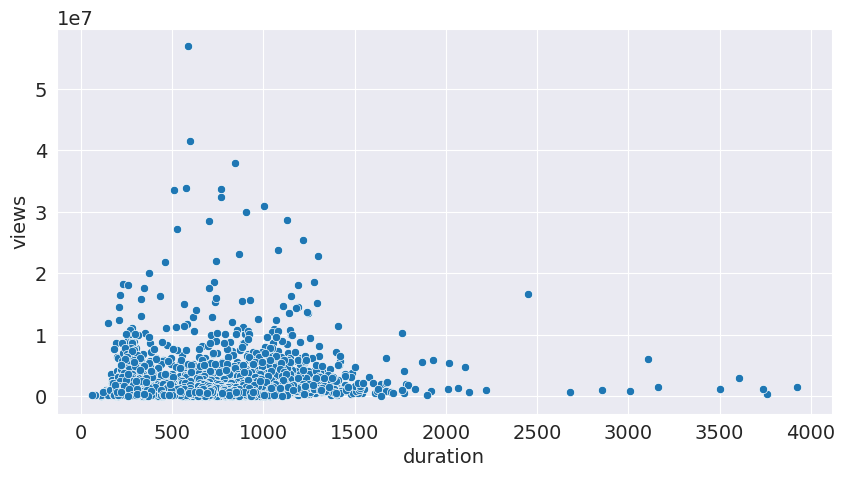

In [ ]:
#DUration Vs Views

sns.scatterplot(x='duration', y='views', data=talk)

<Axes: >

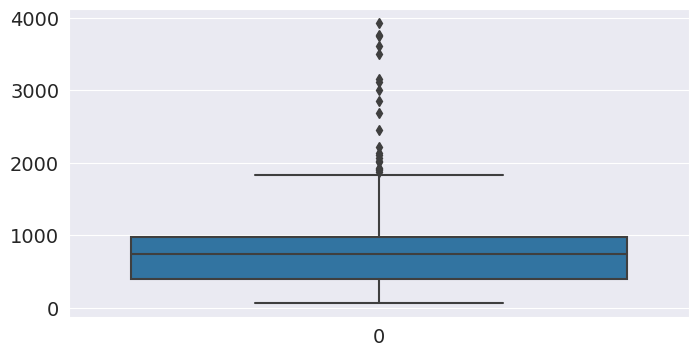

In [ ]:
#checking the outliners of Duration column

plt.figure(figsize=(8,4))
sns.boxplot(talk['duration'])

<Axes: >

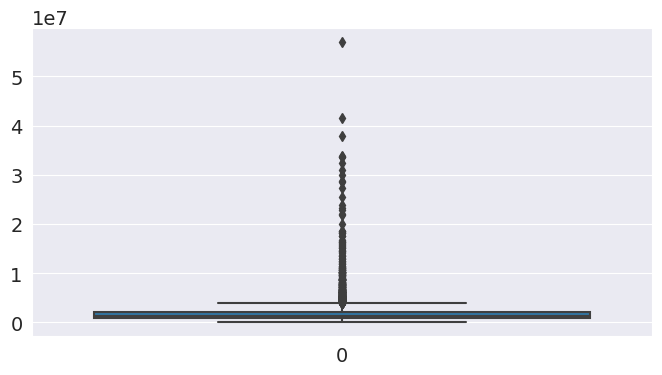

In [ ]:
#checking the outliners of Views column

plt.figure(figsize=(8,4))
sns.boxplot(talk['views'])

<Axes: >

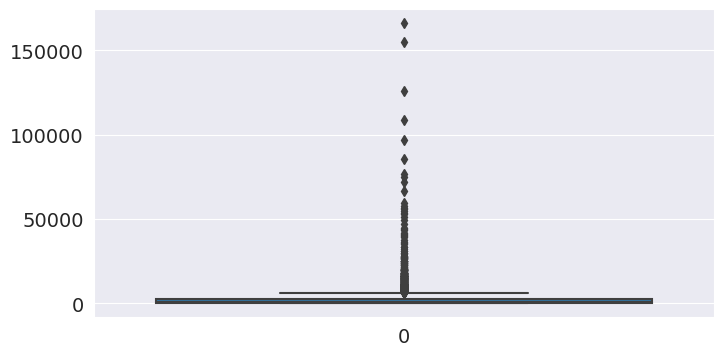

In [ ]:
#checking the outliners of Daily views column

plt.figure(figsize=(8,4))
sns.boxplot(talk['daily_views'])

<Axes: >

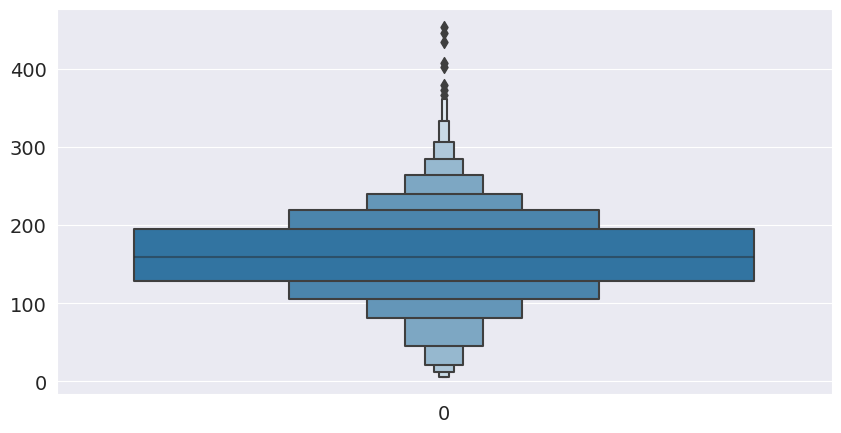

In [ ]:
#checking the outliners of available languages column

sns.boxenplot(talk['available_languages'])

In [ ]:
# treatment outliers by mean

new = ['views','duration','daily_views']
for i in new:
  iqr=  talk[i].quantile(0.75)-talk[i].quantile(0.25)
  talk[i]= talk[i].mask(talk[i]>(talk[i].quantile(0.75)+1.5*iqr), talk[i].mean())

After treating the outliers

<Axes: >

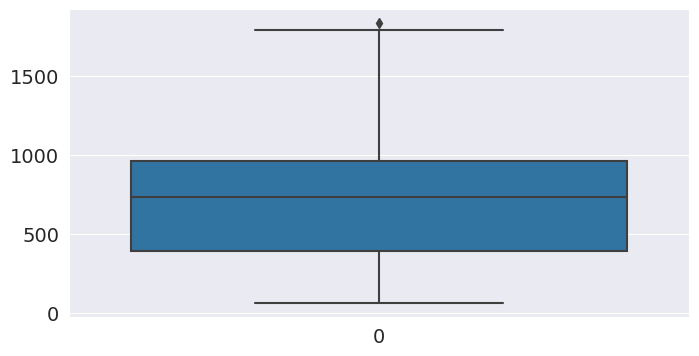

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(talk['duration'])

<Axes: >

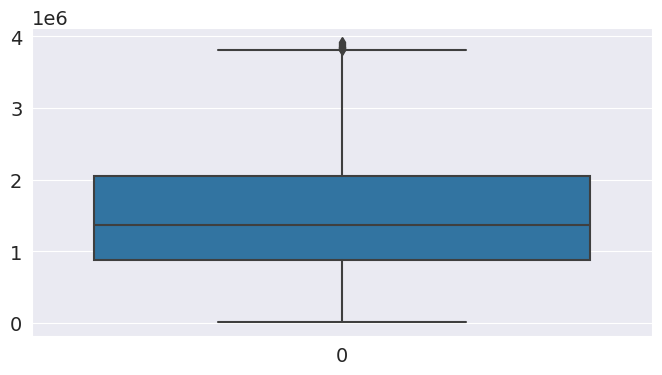

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(talk['views'])

<Axes: >

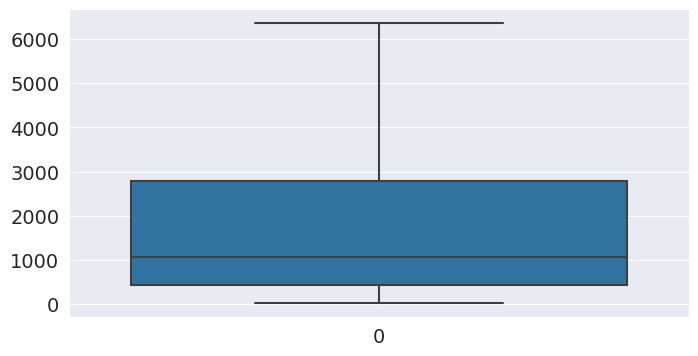

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(talk['daily_views'])

<Axes: xlabel='views', ylabel='Density'>

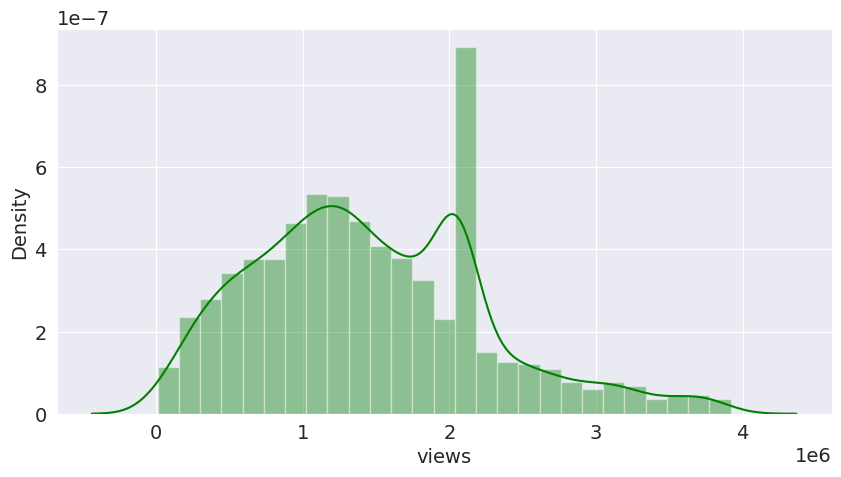

In [ ]:
sns.distplot(talk['views'], color ='green')

<Axes: xlabel='duration', ylabel='Density'>

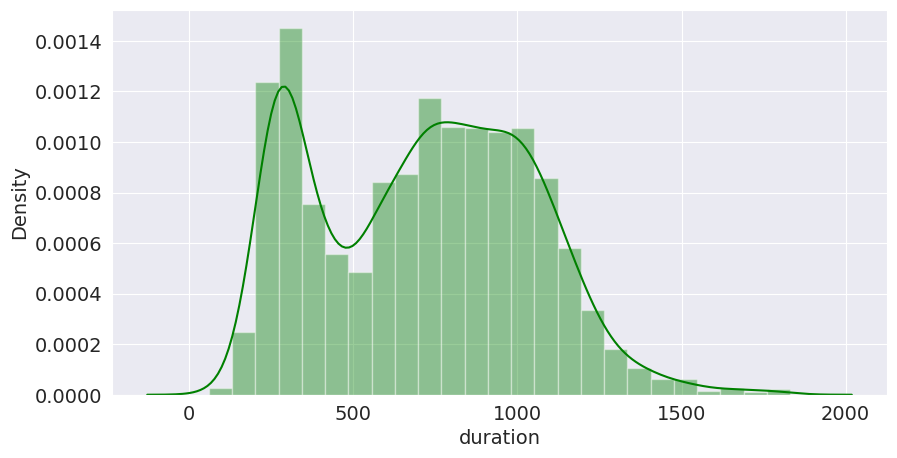

In [ ]:
sns.distplot(talk['duration'], color ='green')

<Axes: xlabel='daily_views', ylabel='Density'>

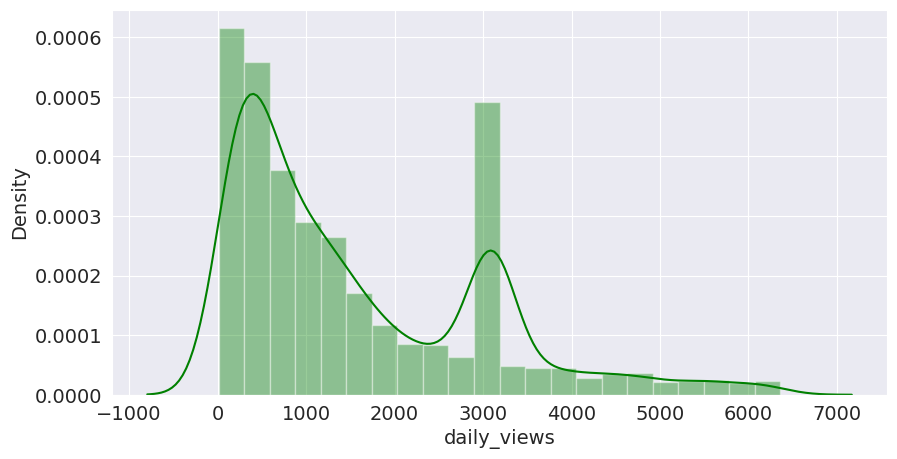

In [ ]:
sns.distplot(talk['daily_views'], color ='green')

In [ ]:
fig = px.scatter_3d(talk, x=talk['duration'], y=talk['comments'], z=talk['views'])

fig.show()

In [ ]:
#Maximum and minimum of views column

print(talk['views'].max(),talk['views'].min())

3917905.0 10004.0


In [ ]:
# Create a new column 'speaker_popularity' in the main DataFrame and assign the categories

talk['speaker_popularity'] = ""
talk.loc[talk['views'] <= 100000, 'speaker_popularity'] = 'not_popular'
talk.loc[(talk['views'] > 100000) & (talk['views'] <= 1000000), 'speaker_popularity'] = 'avg_popular'
talk.loc[(talk['views'] > 1000000) & (talk['views'] <= 2000000), 'speaker_popularity'] = 'popular'
talk.loc[(talk['views'] > 2000000) & (talk['views'] <= 3000000), 'speaker_popularity'] = 'high_popular'
talk.loc[talk['views'] > 3000000, 'speaker_popularity'] = 'extreme_popular'

In [ ]:
talk.sample()

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,days_since,year,month,published_day,daynumber,daily_views,available_languages,speaker_popularity
41,Why people believe weird things,Michael Shermer,2.051773e+06,2006-02-23,2006-11-08,TED2006,en,"['ar', 'az', 'bg', 'cs', 'da', 'de', 'el', 'en...",530.0,805.0,"['culture', 'entertainment', 'faith', 'illusio...",4922 days,2006,11,Wednesday,3,1500.377615,267,high_popular


<Axes: xlabel='speaker_popularity', ylabel='comments'>

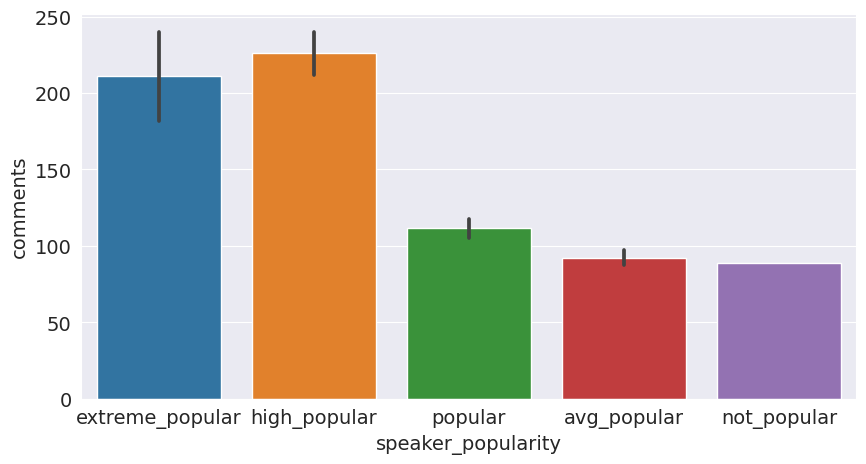

In [ ]:
sns.barplot(data=talk, x='speaker_popularity', y='comments')

In [ ]:
talk.sample()

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,days_since,year,month,published_day,daynumber,daily_views,available_languages,speaker_popularity
2406,How pollution is changing the ocean's chemistry,Triona McGrath,1523925.0,2016-02-06,2017-05-29,TEDxFulbrightDublin,en,"['ar', 'cs', 'de', 'el', 'en', 'es', 'fa', 'fr...",127.0,543.0,"['animals', 'biodiversity', 'biosphere', 'biol...",1067 days,2017,5,Monday,1,1426.896067,177,popular


<Axes: >

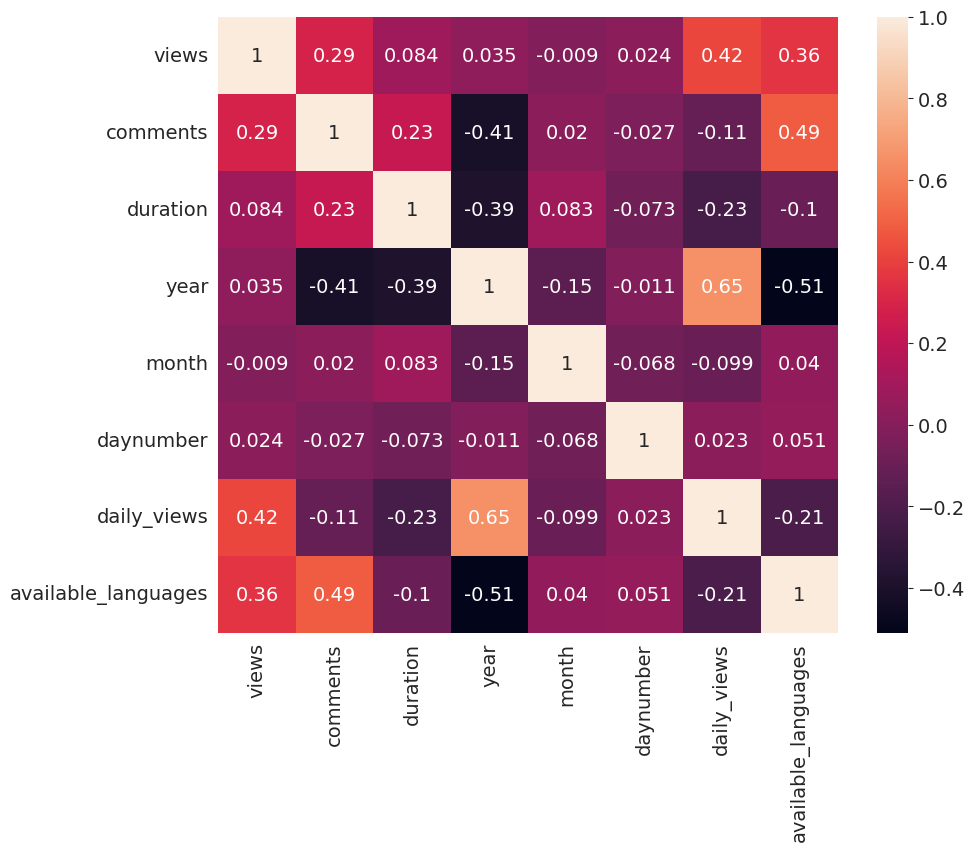

In [ ]:
# Plotting correlation  matrix for all features with respect to target variable

correlmap = talk.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

In [ ]:
pt = PowerTransformer()
talk['views'] = pt.fit_transform(pd.DataFrame(talk['views']))

In [ ]:
talk.sample()

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,days_since,year,month,published_day,daynumber,daily_views,available_languages,speaker_popularity
1684,What does the future hold? 11 characters offer...,Sarah Jones,0.398203,2014-03-21,2014-05-02,TED2014,en,"['ar', 'el', 'en', 'es', 'fa', 'fr', 'he', 'it...",87.0,1116.0,"['future', 'humor', 'performance', 'theater']",2190 days,2014,5,Friday,5,773.421725,135,popular


In [ ]:
unwanted = ['event','native_lang','title','month',
                       'speaker','recorded_date','available_lang','topics','published_date','year']

In [ ]:
talks = talk.drop(columns = unwanted)

In [ ]:
talks.sample()

,views,comments,duration,days_since,published_day,daynumber,daily_views,available_languages,speaker_popularity
1098,-0.703583,791.0,1060.0,2994 days,Saturday,6,284.421035,153,avg_popular


In [ ]:
talks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 4003
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   views                3970 non-null   float64        
 1   comments             3970 non-null   float64        
 2   duration             3970 non-null   float64        
 3   days_since           3970 non-null   timedelta64[ns]
 4   published_day        3970 non-null   object         
 5   daynumber            3970 non-null   int64          
 6   daily_views          3970 non-null   float64        
 7   available_languages  3970 non-null   int64          
 8   speaker_popularity   3970 non-null   object         
dtypes: float64(4), int64(2), object(2), timedelta64[ns](1)
memory usage: 439.2+ KB


In [ ]:
talks['days_since'] = talks['days_since'].dt.days.astype('int16')

In [ ]:
vif=talks.drop(['published_day','speaker_popularity'],axis=1)

In [ ]:
vif.sample()

,views,comments,duration,days_since,daynumber,daily_views,available_languages
1597,0.796459,401.0,935.0,2320,1,2479.516588,225


In [ ]:
vif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 4003
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   views                3970 non-null   float64
 1   comments             3970 non-null   float64
 2   duration             3970 non-null   float64
 3   days_since           3970 non-null   int16  
 4   daynumber            3970 non-null   int64  
 5   daily_views          3970 non-null   float64
 6   available_languages  3970 non-null   int64  
dtypes: float64(4), int16(1), int64(2)
memory usage: 353.9 KB


In [ ]:
#vif['recorded_date'] = vif['recorded_date'].dt.days.astype('int16')

In [ ]:
# calculate VIF for each column

vif_df=pd.DataFrame()
vif_df['features']=vif.columns
vif_df['VIF']=[variance_inflation_factor(vif.values,i) for i in range(vif.shape[1])]
vif_df

,features,VIF
0,views,1.261339
1,comments,2.565490
2,duration,5.419621
3,days_since,8.441290
4,daynumber,4.915646
5,daily_views,3.842103
6,available_languages,11.000690


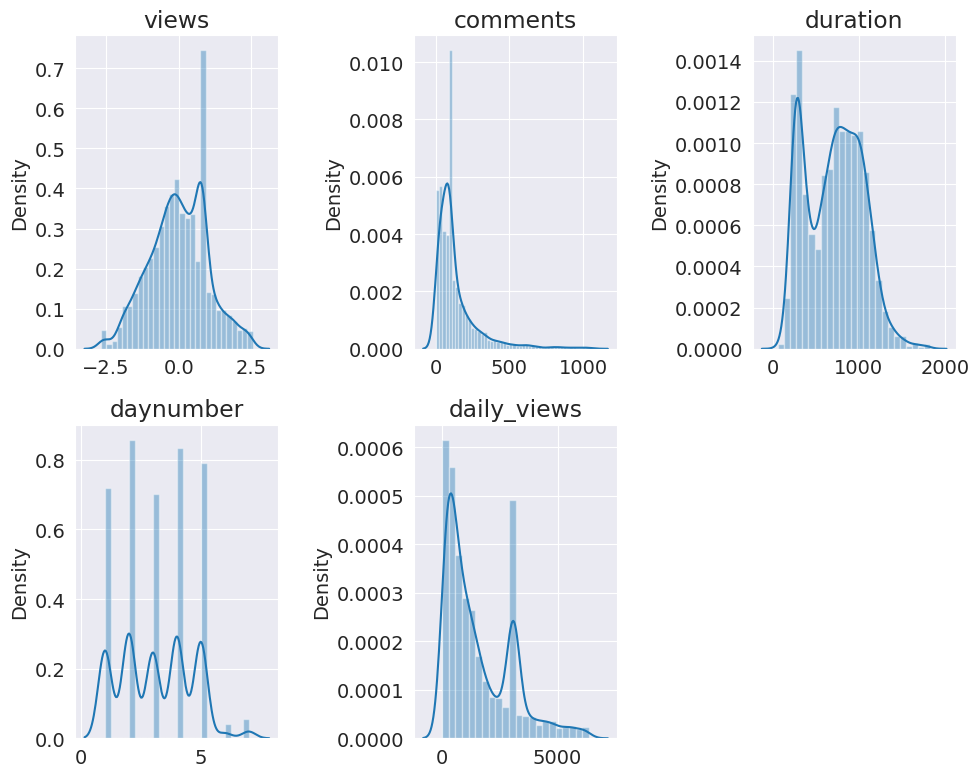

In [ ]:
# Ploting distributions of features

fig = plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
plt.title("views")
sns.distplot(x= talks['views'])

plt.subplot(2,3,2)
plt.title("comments")
sns.distplot(x= talks['comments'])

plt.subplot(2,3,3)
plt.title("duration")
sns.distplot(x= talks['duration'])

plt.subplot(2,3,4)
plt.title("daynumber")
sns.distplot(x= talks['daynumber'])

plt.subplot(2,3,5)
plt.title("daily_views")
sns.distplot(x= talks['daily_views'])

#plt.subplot(2,3,5)
#plt.title("days_since")
#sns.distplot(x= talks['days_since'])

plt.tight_layout()
plt.show()

In [ ]:
talks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 4003
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   views                3970 non-null   float64
 1   comments             3970 non-null   float64
 2   duration             3970 non-null   float64
 3   days_since           3970 non-null   int16  
 4   published_day        3970 non-null   object 
 5   daynumber            3970 non-null   int64  
 6   daily_views          3970 non-null   float64
 7   available_languages  3970 non-null   int64  
 8   speaker_popularity   3970 non-null   object 
dtypes: float64(4), int16(1), int64(2), object(2)
memory usage: 415.9+ KB


In [ ]:
talks.sample()

,views,comments,duration,days_since,published_day,daynumber,daily_views,available_languages,speaker_popularity
1782,-0.501241,38.0,570.0,2036,Friday,5,485.837506,201,avg_popular


In [ ]:
talks = talks.astype({'comments':'int64', 'views':'int64','daily_views':'int64','available_languages':'int64'})

talks = talks.astype({
    'speaker_popularity': 'category',
    'published_day': 'category',
})

In [ ]:
talks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 4003
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   views                3970 non-null   int64   
 1   comments             3970 non-null   int64   
 2   duration             3970 non-null   float64 
 3   days_since           3970 non-null   int16   
 4   published_day        3970 non-null   category
 5   daynumber            3970 non-null   int64   
 6   daily_views          3970 non-null   int64   
 7   available_languages  3970 non-null   int64   
 8   speaker_popularity   3970 non-null   category
dtypes: category(2), float64(1), int16(1), int64(5)
memory usage: 362.2 KB


In [ ]:
# Transformation
talks['daily_views']=np.log(talks['daily_views'])


In [ ]:
talks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 4003
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   views                3970 non-null   int64   
 1   comments             3970 non-null   int64   
 2   duration             3970 non-null   float64 
 3   days_since           3970 non-null   int16   
 4   published_day        3970 non-null   category
 5   daynumber            3970 non-null   int64   
 6   daily_views          3970 non-null   float64 
 7   available_languages  3970 non-null   int64   
 8   speaker_popularity   3970 non-null   category
dtypes: category(2), float64(2), int16(1), int64(4)
memory usage: 362.2 KB


In [ ]:
talks=talks.dropna()

In [ ]:
data_dummy=pd.get_dummies(talks,drop_first=True)
data_dummy.shape

(3970, 17)

In [ ]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 4003
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   views                               3970 non-null   int64  
 1   comments                            3970 non-null   int64  
 2   duration                            3970 non-null   float64
 3   days_since                          3970 non-null   int16  
 4   daynumber                           3970 non-null   int64  
 5   daily_views                         3970 non-null   float64
 6   available_languages                 3970 non-null   int64  
 7   published_day_Monday                3970 non-null   uint8  
 8   published_day_Saturday              3970 non-null   uint8  
 9   published_day_Sunday                3970 non-null   uint8  
 10  published_day_Thursday              3970 non-null   uint8  
 11  published_day_Tuesday               3970 no

In [ ]:
# split the Dataset into independent(x) and dependent(y) Dataset
X = data_dummy.drop(columns= ['daily_views'])
y = data_dummy['daily_views']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 4003
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   views                               3970 non-null   int64  
 1   comments                            3970 non-null   int64  
 2   duration                            3970 non-null   float64
 3   days_since                          3970 non-null   int16  
 4   daynumber                           3970 non-null   int64  
 5   available_languages                 3970 non-null   int64  
 6   published_day_Monday                3970 non-null   uint8  
 7   published_day_Saturday              3970 non-null   uint8  
 8   published_day_Sunday                3970 non-null   uint8  
 9   published_day_Thursday              3970 non-null   uint8  
 10  published_day_Tuesday               3970 non-null   uint8  
 11  published_day_Wednesday             3970 no

In [ ]:
X.shape

(3970, 16)

In [ ]:
y

0       6.545350
1       7.961021
2       5.937536
3       6.265301
5       5.476464
          ...   
3999    8.038189
4000    8.038189
4001    8.038189
4002    8.038189
4003    8.038189
Name: daily_views, Length: 3970, dtype: float64

In [ ]:
# calling train_test_split() to get the training and testing data.

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print(x_train.shape)
print(x_test.shape)

(3176, 16)
(794, 16)


In [ ]:
x_train[0:5]

,views,comments,duration,days_since,daynumber,available_languages,published_day_Monday,published_day_Saturday,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday,speaker_popularity_extreme_popular,speaker_popularity_high_popular,speaker_popularity_not_popular,speaker_popularity_popular
1452,0,1005,889.0,2544,1,213,1,0,0,0,0,0,0,1,0,0
1365,0,172,608.0,2662,2,165,0,0,0,0,1,0,0,0,0,1
1811,0,147,942.0,1995,4,165,0,0,0,1,0,0,0,1,0,0
3183,-1,89,192.0,443,2,183,0,0,0,0,1,0,0,0,0,0
3260,1,89,252.0,426,5,141,0,0,0,0,0,0,0,1,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 4003
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   views                               3970 non-null   int64  
 1   comments                            3970 non-null   int64  
 2   duration                            3970 non-null   float64
 3   days_since                          3970 non-null   int16  
 4   daynumber                           3970 non-null   int64  
 5   available_languages                 3970 non-null   int64  
 6   published_day_Monday                3970 non-null   uint8  
 7   published_day_Saturday              3970 non-null   uint8  
 8   published_day_Sunday                3970 non-null   uint8  
 9   published_day_Thursday              3970 non-null   uint8  
 10  published_day_Tuesday               3970 non-null   uint8  
 11  published_day_Wednesday             3970 no

In [ ]:
scaler=StandardScaler()
scaler.fit(X)
x=scaler.transform(X)

###**Linear Regression**

In [ ]:
#Fitting Linear regression on train data

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# predict the train and test dataset

y_pred_train = reg.predict(x_train)
y_pred = reg.predict(x_test)

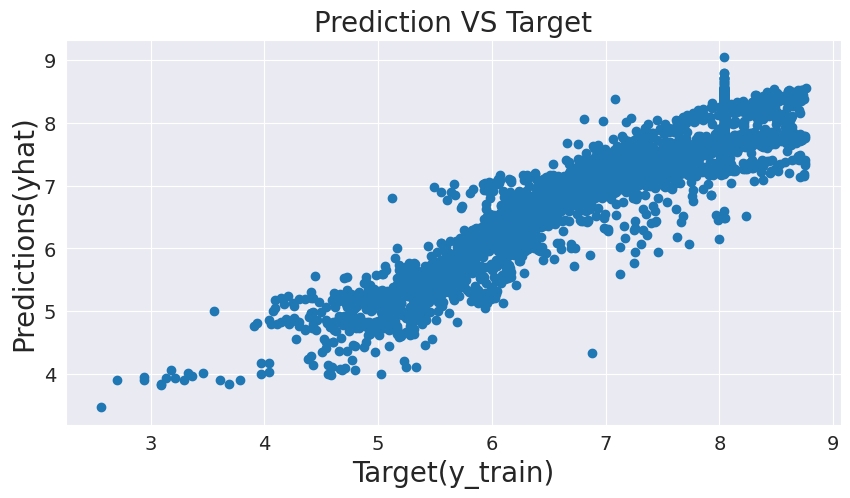

In [ ]:
plt.scatter(y_train,y_pred_train)
plt.xlabel('Target(y_train)',fontsize=20)
plt.ylabel('Predictions(yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

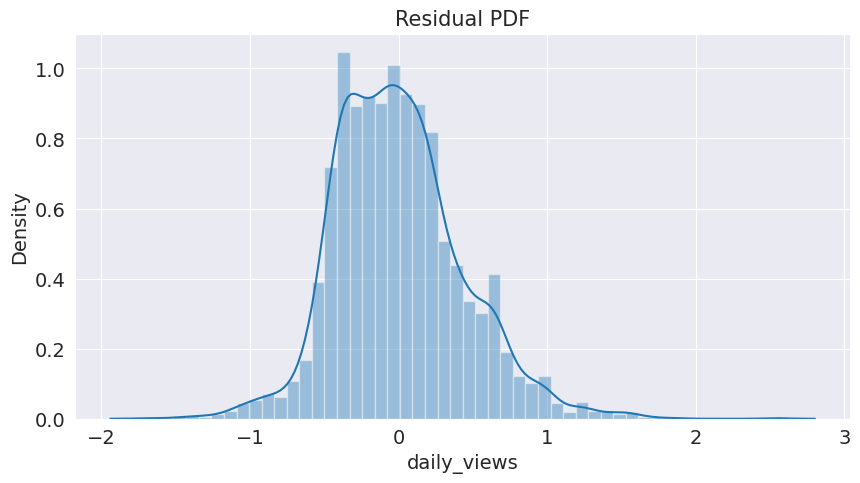

In [ ]:
sns.distplot(y_train-y_pred_train)
plt.title('Residual PDF',fontsize=15)
plt.show()

In [ ]:
mean_squared_error(y_test, y_pred)

0.18681164332735212

In [ ]:
# Train performance
from numpy import math

math.sqrt(mean_squared_error(y_train, y_pred_train))

0.430714327696244

In [ ]:
# Test performance

math.sqrt(mean_squared_error(y_test, y_pred))

0.432217125212956

In [ ]:
R2 = reg.score(x_train,y_train)
Adjusted_R2_score = (1-(1-r2_score(y_train,y_pred_train))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))

print('R2 Score of train : ', R2)
print('adjusted R2 score of train : ', Adjusted_R2_score)

R2 Score of train :  0.8520649607552102
adjusted R2 score of train :  0.8513156854693866


In [ ]:
r2 = r2_score(y_test, y_pred)
Adjusted_R2_score = (1-(1-r2_score(y_test,y_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print('R2 Score of test : ', R2)
print('adjusted R2 score of test : ', Adjusted_R2_score)

R2 Score of test :  0.8520649607552102
adjusted R2 score of test :  0.8491840914113065


In [ ]:
reg.intercept_

7.714406549541576

In [ ]:
reg.coef_

array([ 1.20980098e-01,  9.25905796e-04, -1.09198592e-04, -5.71756265e-04,
       -3.96024163e-02, -7.75864858e-04, -1.74607922e-01, -4.65708712e-01,
       -3.44563579e-01, -1.43224966e-02, -7.71083145e-02, -8.55771632e-02,
        9.88742191e-01,  1.18153746e+00, -2.93809765e+00,  5.38921910e-01])

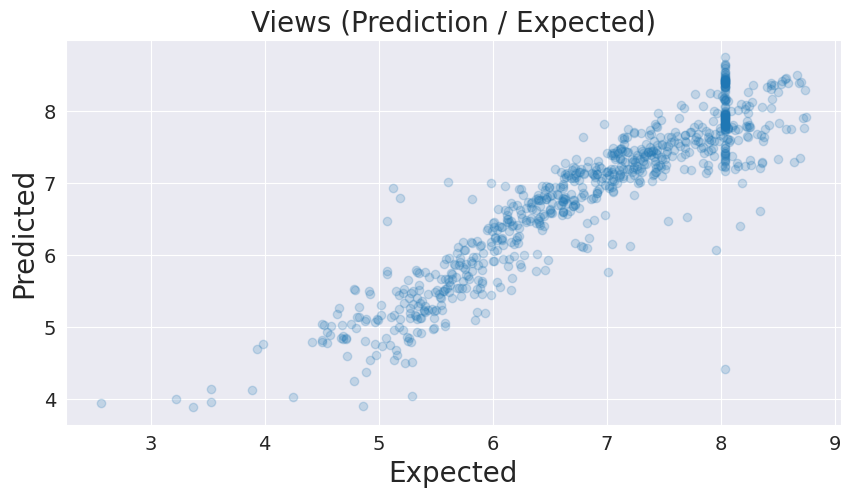

In [ ]:
yhat_test=reg.predict(x_test)
plt.scatter(y_test,yhat_test,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Views (Prediction / Expected)',fontsize=20)
plt.show()

In [ ]:
MSE  = mean_squared_error(np.exp(y_test), np.exp(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 658219.795203727
RMSE : 811.3074603402381


In [ ]:
MAE_reg = mean_absolute_error(y_test,y_pred)

In [ ]:
print('Mean absolute error : ', MAE_reg)

Mean absolute error :  0.3153204834800601


In [ ]:
variability_df=pd.DataFrame({"R-Square":r2,"Adjusted R-Square":Adjusted_R2_score},index=["Values"])
variability_df

,R-Square,Adjusted R-Square
Values,0.852227,0.849184


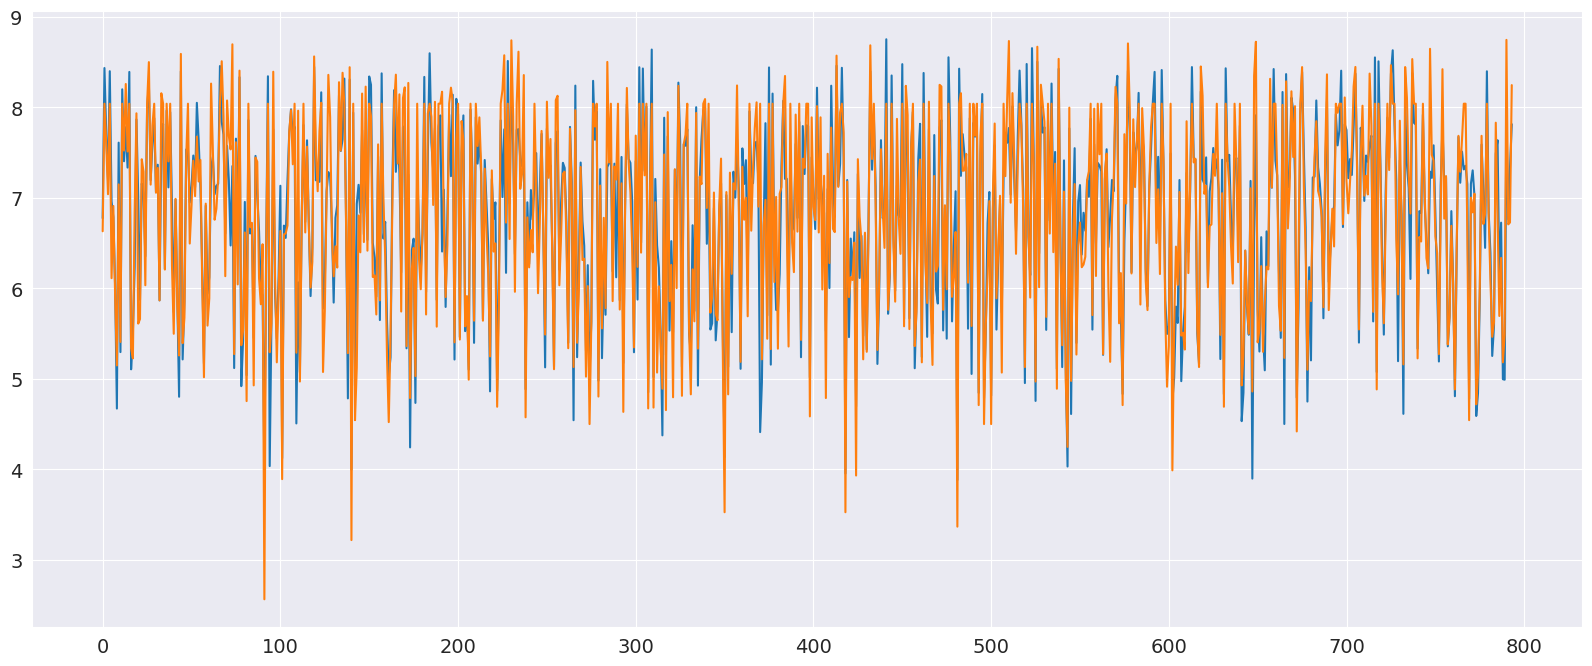

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))

###**Lasso Regression**

In [ ]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.coef_

array([ 1.23709687e-01,  9.26091422e-04, -1.07996044e-04, -5.72386885e-04,
       -1.22346836e-02, -7.56960877e-04, -6.36708572e-02, -4.81618344e-01,
       -3.90952539e-01,  1.33517326e-02,  5.45363372e-03, -2.95660025e-02,
        9.79411567e-01,  1.17725080e+00, -2.92452869e+00,  5.36325518e-01])

In [ ]:
# giving parameters

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -0.18801128374564618


In [ ]:
# predict the test dataset

y_pred_lasso = lasso_regressor.predict(x_test)

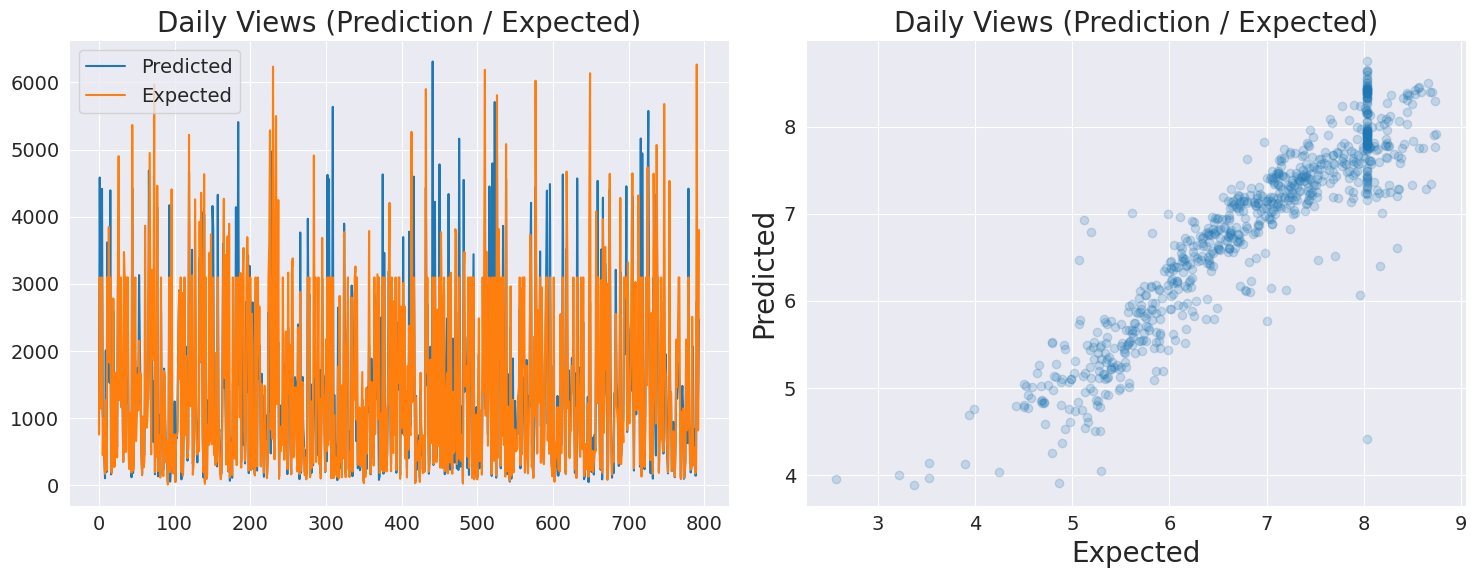

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(np.exp(y_pred_lasso))
plt.plot(np.exp(np.array(y_test)))
plt.legend(["Predicted","Expected"])
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.subplot(1,2,2)
yhat_test=reg.predict(x_test)
plt.scatter(y_test,y_pred_lasso,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
MSE=mean_squared_error(np.exp(y_test), np.exp(y_pred_lasso))

RMSE=math.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_lasso)))

In [ ]:
print("MSE :" , MSE)

print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 658217.0845519548
RMSE : 811.3057897931918
R2 : 0.8523169024894983
Adjusted R2 :  0.8492758091044686


In [ ]:
MAE_Lasso = mean_absolute_error(y_test,y_pred_lasso)

In [ ]:
print('Mean absolute error : ', MAE_Lasso)

Mean absolute error :  0.3152605977097896


###**Ridge Regression**

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.18826390911106552


In [ ]:
y_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
MSE  = mean_squared_error(np.exp(y_test), np.exp(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 658217.0845519548
RMSE : 811.3057897931918
R2 : 0.8522320928376025
Adjusted R2 :  0.8491892530504745


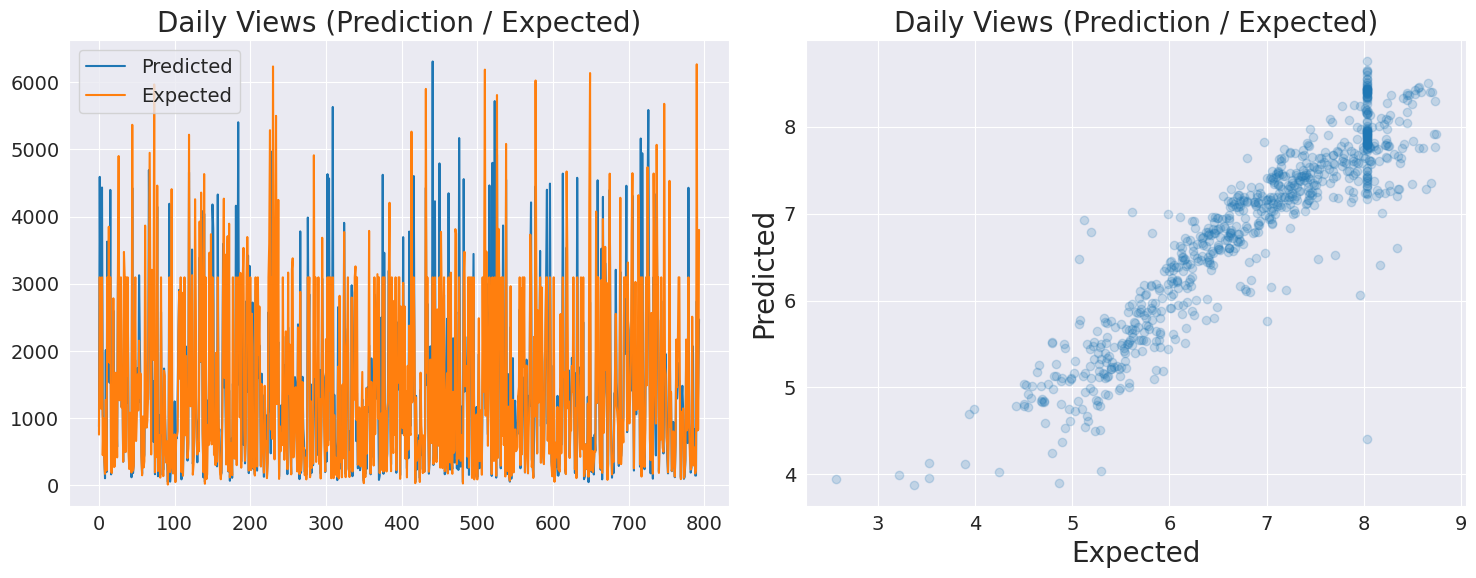

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(np.exp(y_pred_ridge))
plt.plot(np.exp(np.array(y_test)))
plt.legend(["Predicted","Expected"])
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.subplot(1,2,2)
yhat_test=reg.predict(x_test)
plt.scatter(y_test,y_pred_ridge,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
MAE_Ridge = mean_absolute_error(y_test,y_pred_ridge)

In [ ]:
print('Mean absolute error : ', MAE_Ridge)

Mean absolute error :  0.31532047202287766


###**Elastic Regression**

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.8}

Using  {'alpha': 0.0001, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.18800557397391654


In [ ]:
y_pred_elastic = elastic_regressor.predict(x_test)


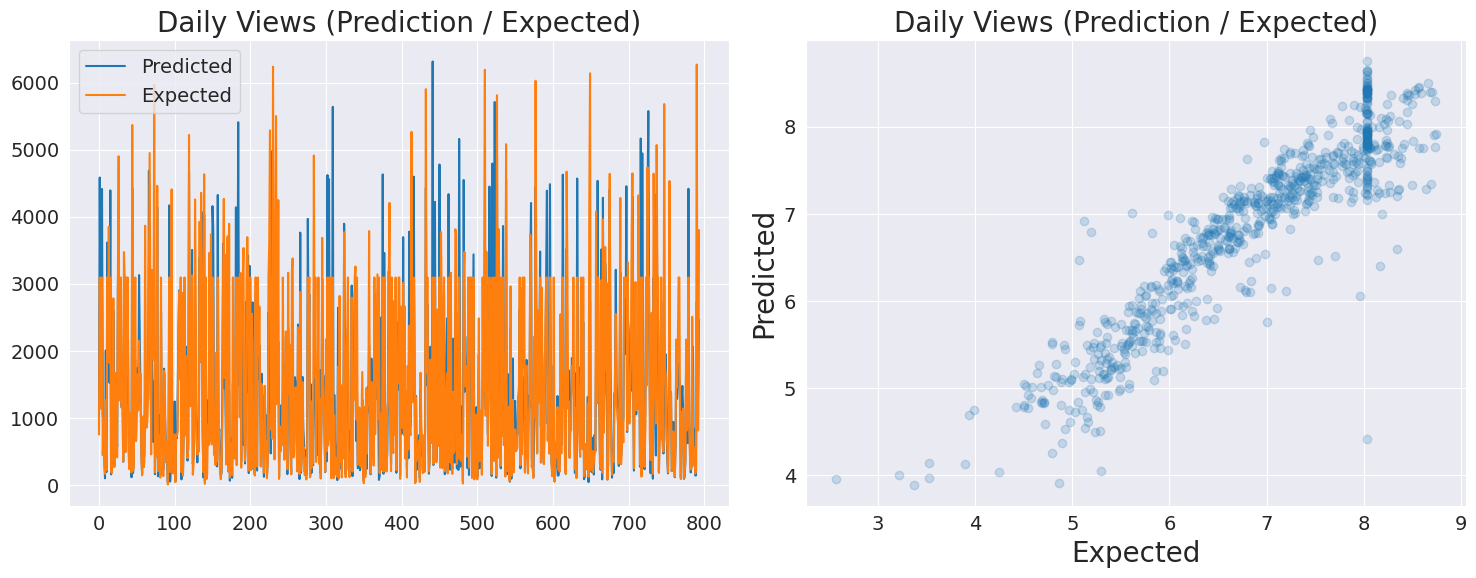

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(np.exp(y_pred_elastic))
plt.plot(np.exp(np.array(y_test)))
plt.legend(["Predicted","Expected"])
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.subplot(1,2,2)
yhat_test=reg.predict(x_test)
plt.scatter(y_test,y_pred_elastic,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
MSE=mean_squared_error(np.exp(y_test), np.exp(y_pred_elastic))


RMSE=math.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_elastic)))

print("MSE :" , MSE)

print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_elastic))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 657858.3752353676
RMSE : 811.0846905443152
R2 : 0.8523289349544698
Adjusted R2 :  0.8492880893422066


In [ ]:
MAE_Elastic = mean_absolute_error(y_test,y_pred_elastic)

In [ ]:
print('Mean absolute error : ', MAE_Elastic)

Mean absolute error :  0.3152724885560308


##**Conclusion** :-

After evaluating multiple regression models on the dataset, Lesso Regressor perform better than other models. They have higher R2 scores, lower error metrics, and can generalize well on unseen data.

###**lesso regression**:

Testing data R2 and Adjusted R2 Score :

R2 : 0.8523169024894983

Adjusted R2 :  0.8492758091044686


MSE : 658217.0845519548

RMSE : 811.3057897931918

Mean absolute error :  0.3152605977097896



